<a href="https://colab.research.google.com/github/BlinkovYevhenGit/CE888_Repository/blob/main/Lab7/Lab7_Exercise2_DogvsCat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats 

In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

![alt text](https://miro.medium.com/max/3000/1*bhFifratH9DjKqMBTeQG5A.gif)

Ref: https://medium.com/@thegrigorian/rolling-in-the-deep-cnn-c8d3f7108c8c

Get your API Key from Kaggle using following steps:
1. Login to [Kaggle](https://www.kaggle.com/) or Register if you don't have account
2. Open Dataset (https://www.kaggle.com/c/dogs-vs-cats/rules) and accept terms and condition. 
3. On the top right corner click on your Icon and go to accounts and press a button "Create New API Token". It will download a JSON file containing your username and key. 
4. Now, paste both below. 


In [ ]:

os.environ['KAGGLE_USERNAME'] = "yevhenblinkov" # username from the json file
os.environ['KAGGLE_KEY'] = "" # key from the json file
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

     |████████████████████████████████| 61kB 8.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=39f152870baf6a8bcd3a6d695c070245a2f676e89b078c8fdf7d41eab5bb8441
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
 97% 787M/812M [00:06<00:00, 119MB/s]
100% 812M/812M [00:06<00:00, 133MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/test1.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
import os

In [ ]:
# Make new base directory
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

FileExistsError: ignored

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: ignored

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Using ImageDataGenerator to read images from directories
As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely,like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring anepoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 40s 71ms/step - loss: 0.6953 - acc: 0.5266 - val_loss: 0.6724 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6648 - acc: 0.6113 - val_loss: 0.6475 - val_acc: 0.6150
Epoch 3/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6279 - acc: 0.6481 - val_loss: 0.6498 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5885 - acc: 0.6990 - val_loss: 0.5541 - val_acc: 0.7100
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5329 - acc: 0.7266 - val_loss: 0.5467 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.4968 - acc: 0.7586 - val_loss: 0.5982 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 7s 69ms/step - loss: 0.4910 - acc: 0.7481 - val_loss: 0.6050 - val_acc: 0.6550
Epoch 8/30
100/100 [==============================] - 7s 69ms/step -

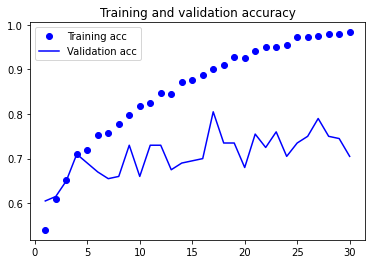

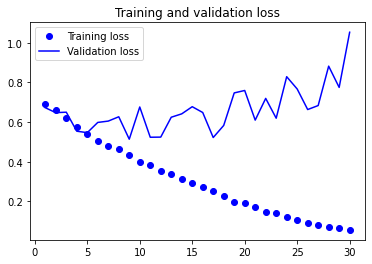

In [ ]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Convolutional Networks with Dropout

![alt text](https://camo.githubusercontent.com/ee6fa1073247cd2c3d241300caf110d7a7541bc5/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a4972644a355067684439596f4f7956415137334d4a772e676966)

Ref: https://github.com/mneha4/Training-Neural-Nets---Guidelines

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 17s 173ms/step - loss: 0.6863 - acc: 0.5395 - val_loss: 0.6731 - val_acc: 0.5410
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6743 - acc: 0.5695 - val_loss: 0.6497 - val_acc: 0.6110
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6671 - acc: 0.5845 - val_loss: 0.6407 - val_acc: 0.6310
Epoch 4/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6561 - acc: 0.6035 - val_loss: 0.6459 - val_acc: 0.5740
Epoch 5/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6330 - acc: 0.6400 - val_loss: 0.6603 - val_acc: 0.6060
Epoch 6/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6189 - acc: 0.6595 - val_loss: 0.5909 - val_acc: 0.6830
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6047 - acc: 0.6670 - val_loss: 0.5746 - val_acc: 0.6820
Epoch 8/20
100/100 [==============================] - 1

# Task 2:

We have used Dropout to enhance the performance of the CNN model. Can you please use whatever you like to further enhance the performance from `val_acc: 0.7506`? 

In [ ]:
from sklearn.model_selection import ParameterGrid
optimizers = ['rmsprop', 'adam',]
activations = ['relu', 'sigmoid','tanh']
epochs = [25]
steps = [100]
batches=[20]

In [ ]:
param_grid = ParameterGrid(dict(optimizer=optimizers,activation=activations,epochs=epochs, batch_size=batches,steps_per_epoch=steps))

In [ ]:
len(param_grid)

6

In [ ]:
histories=[]
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batches[0],
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=batches[0],
                                                        class_mode='binary')
for i in range(0, len(param_grid)):
  activation=param_grid[i]["activation"]
  optimizer=param_grid[i]["optimizer"]
  epoch=param_grid[i]["epochs"]
  steps_per_epoch=param_grid[i]["steps_per_epoch"]
  batch_size=param_grid[i]["batch_size"]
  print()
  print()

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation,
  input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation=activation))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
  history = model.fit_generator(train_generator,
                                steps_per_epoch=steps_per_epoch,
                                epochs=epoch,
                                validation_data=validation_generator,
                                validation_steps=50, verbose=1)
  histories.append(history)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
100/100 [==============================] - 50s 174ms/step - loss: 0.8431 - acc: 0.4865 - val_loss: 0.6928 - val_acc: 0.5860
Epoch 2/25
100/100 [==============================] - 17s 173ms/step - loss: 0.6994 - acc: 0.5237 - val_loss: 0.7844 - val_acc: 0.5000
Epoch 3/25
100/100 [==============================] - 17s 171ms/step - loss: 0.7032 - acc: 0.5562 - val_loss: 0.6668 - val_acc: 0.6040
Epoch 4/25
100/100 [==============================] - 17s 171ms/step - loss: 0.6732 - acc: 0.6049 - val_loss: 0.6613 - val_acc: 0.5870
Epoch 5/25
100/100 [==============================] - 17s 171ms/step - loss: 0.6711 - acc: 0.5876 - val_loss: 0.6290 - val_acc: 0.6680
Epoch 6/25
100/100 [==============================] - 17s 171ms/step - loss: 0.6544 - acc: 0.6319 - val_loss: 0.6092 - val_acc: 0.6790
Epoch 7/25
100/100 [==============================] - 17s 172ms/step - loss: 0.6214 - acc: 0.6585 - val_loss: 0.6014 - val_acc: 0.6800
Epoch 8/25
100/100 [==============================] - 1

In [ ]:
# def create_model(optimizer='rmsprop', activation="relu"):
#   model = models.Sequential()
#   model.add(layers.Conv2D(32, (3, 3), activation=activation,
#   input_shape=(150, 150, 3)))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(64, (3, 3), activation=activation))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(128, (3, 3), activation=activation))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(128, (3, 3), activation=activation))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Flatten())
#   model.add(layers.Dropout(0.5))
#   model.add(layers.Dense(512, activation=activation))
#   model.add(layers.Dense(1, activation='sigmoid'))

#   model.compile(loss='binary_crossentropy',
#               optimizer=optimizer,
#               metrics=['acc'])
#   return model

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# model = KerasClassifier(build_fn=create_model, verbose=1)
# # init = ['glorot_uniform', 'normal', 'uniform']


# param_grid = dict(optimizer=optimizers,activation=activations,nb_epoch=epochs, batch_size=batches)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=3)
# grid_result = grid.fit(train_images, train_labels)

# df = pd.DataFrame(grid_result.cv_results_).drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time"], axis =1).sort_values(by='rank_test_score')
# first_column = df.pop('rank_test_score') 
# df.insert(0, 'rank_test_score', first_column) 
# df